In [25]:
import pandas as pd
import numpy as np
import nltk
!pip install wordcloud


  Stored in directory: C:\Users\T480S\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Stored in directory: C:\Users\T480S\AppData\Local\pip\Cache\wheels\0c\61\d2\d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built pyLDAvis future


In [22]:
!pip install gensim
!pip install pyLDAvis

In [4]:
reviews = pd.read_csv("reviews_modifed.csv")
# reviews

In [5]:
text=''
for review in reviews['review']:
    text+=review
text #所有评论汇总在一起
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
#Remove unwanted words
DELETE_WORDS = ['app', 'good','great','love','need']
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

#Remove short words
MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string

In [6]:
text = remove_words(text)
text = remove_short_words(text)

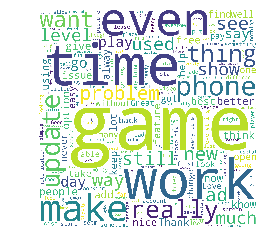

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text) #WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show() #所有的评论一起显示为一个图

In [8]:
category = reviews['category'].unique()
category

array(['Health & Fitness', 'Shopping', 'Medical', 'Games', 'Utilities',
       'Social Networking', 'Travel', 'Sports', 'Lifestyle',
       'Productivity', 'Entertainment', 'Photo & Video', 'Finance',
       'News', 'Education', 'Weather', 'Business', 'Navigation',
       'Books & Reference', 'Food & Drink'], dtype=object)

In [9]:
category_list = list(category)

In [57]:
review_list = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

In [58]:
# 'Health & Fitness', 'Shopping', 'Medical', 'Games', 'Utilities',
#        'Social Networking', 'Travel', 'Sports', 'Lifestyle',
#        'Productivity', 'Entertainment', 'Photo & Video', 'Finance',
#        'News', 'Education', 'Weather', 'Business', 'Navigation',
#        'Books & Reference', 'Food & Drink'], dtype=object
for k in range(len(reviews['review'])):
    for i in range(len(category)):
        if reviews['category'].iloc[k] == category[i]:
            review_list[i].append(reviews['review'].iloc[k])
        else:
            pass

In [59]:
review_list[0]

['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
 'This help eating healthy exercise regular basis',
 'Works great especially going grocery store',
 'Best idea us',
 'Best way',
 'Amazing',
 'Looking forward app,',
 'It helpful site ! It help foods get !',
 'good you.',
 'Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.',
 'Thank you! Great app!! Add arthritis, eyes, immunity, kidney/liver detox foods please. :)',
 'Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!',
 'Good health...... Good health first priority.......',
 "Health It's important world either life . think? :)",
 'Mrs sunita bhati I thankful developers,to make kind app, really good healthy food body',
 'Very Useful in diabetes age 30. I need control sugar. thanks',
 'One greatest apps.',
 'good nice',
 'Healthy Really helped',
 'God health',
 '

In [13]:
# list_all

In [14]:
text_list = ['','','','','','','','','','','','','','','','','','','','']

In [15]:
for i in range(len(text_list)):
#     print(i)
#     i+='a'
#     for review in review_list[i]:
    text_list[i] = text_list[i].join(review_list[i])
#     print(text_list[i])

In [16]:
text_list[0]

'I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"This help eating healthy exercise regular basisWorks great especially going grocery storeBest idea usBest wayAmazingLooking forward app,It helpful site ! It help foods get !good you.Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.Thank you! Great app!! Add arthritis, eyes, immunity, kidney/liver detox foods please. :)Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!Good health...... Good health first priority.......Health It\'s important world either life . think? :)Mrs sunita bhati I thankful developers,to make kind app, really good healthy food bodyVery Useful in diabetes age 30. I need control sugar. thanksOne greatest apps.good niceHealthy Really helpedGod healthHEALTH SHOULD ALWAYS BE TOP PRIORITY. !!. ON MYSG5.An excellent A usefulI found lot wealth form heal

In [17]:
name_review = list(zip(category_list, text_list))
name_review

[('Health & Fitness',
  'I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"This help eating healthy exercise regular basisWorks great especially going grocery storeBest idea usBest wayAmazingLooking forward app,It helpful site ! It help foods get !good you.Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.Thank you! Great app!! Add arthritis, eyes, immunity, kidney/liver detox foods please. :)Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!Good health...... Good health first priority.......Health It\'s important world either life . think? :)Mrs sunita bhati I thankful developers,to make kind app, really good healthy food bodyVery Useful in diabetes age 30. I need control sugar. thanksOne greatest apps.good niceHealthy Really helpedGod healthHEALTH SHOULD ALWAYS BE TOP PRIORITY. !!. ON MYSG5.An excellent A usefulI fo

In [61]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)##.pop remove item at current index
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

In [62]:
def do_pos_neg_sentiment_analysis(text_list,debug=False):
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = list()
    for text in text_list:
        cpos = cneg = 0
        for word in word_tokenize(text[1]):
            if word in positive_words:
                if debug:
                    print("Positive",word)
                cpos+=1
            if word in negative_words:
                if debug:
                    print("Negative",word)
                cneg+=1
        results.append((text[0],cpos/len(word_tokenize(text[1])),cneg/len(word_tokenize(text[1]))))
    return results

do_pos_neg_sentiment_analysis(name_review)

[('Health & Fitness', 0.07609189498844399, 0.032277818382948464),
 ('Shopping', 0.05930491531568861, 0.03299321489615165),
 ('Medical', 0.06688327399675088, 0.029345684559814733),
 ('Games', 0.0677476427154282, 0.04530486183551165),
 ('Utilities', 0.0660968094622801, 0.0375211211609184),
 ('Social Networking', 0.05870130584949018, 0.036808718506185244),
 ('Travel', 0.05947368421052632, 0.03243421052631579),
 ('Sports', 0.05834909532136612, 0.03765033367831269),
 ('Lifestyle', 0.07109451758695225, 0.03045785026527805),
 ('Productivity', 0.058301616331372645, 0.032005338342148186),
 ('Entertainment', 0.06704315912259239, 0.03718455717090102),
 ('Photo & Video', 0.061652876597662665, 0.034802485431892086),
 ('Finance', 0.05722538393342294, 0.034375268109932224),
 ('News', 0.050736179635600794, 0.04339380754438445),
 ('Education', 0.07616391332332118, 0.025144818708431667),
 ('Weather', 0.06019095060190951, 0.0352843503528435),
 ('Business', 0.06678105696636925, 0.03603294440631435),
 ('Na

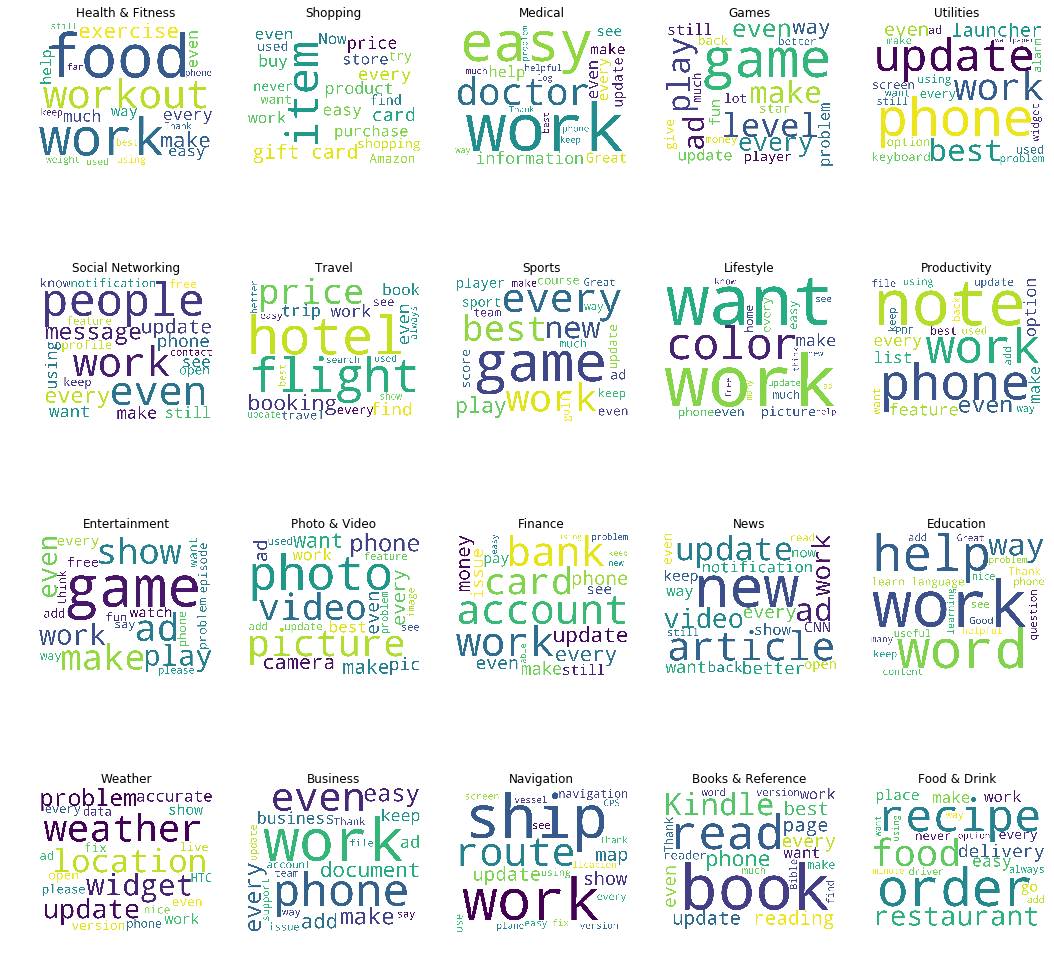

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
#Remove unwanted words
DELETE_WORDS = ['app','great','good','love','need','time','day','thing','really']
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

#Remove short words
MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string

#Set up cloud
COL_NUM = 5
ROW_NUM = 4
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(18,18))

for i in range(0,len(name_review)):
    text_string = remove_words(name_review[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[i//5, i%5] 
    ax.set_title(name_review[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

In [19]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [32]:
def get_topics(num_topics = 5, passes = 10, num_words = 8):
    from nltk import sent_tokenize
    from gensim import corpora
    from gensim.models.ldamodel import LdaModel
    from gensim.parsing.preprocessing import STOPWORDS
    import pprint
    import pyLDAvis.gensim
    review_list = list()
    for review in name_review:
        review_list.append(review[1])
    for i in range(len(review_list)):
        review = review_list[i]
        sents = sent_tokenize(review)
        for j in range(len(sents)):
            sent = sents[j]
            sent = sent.strip().replace('\n','')
            sents[j] = sent
        review_list[i] = ' '.join(sents)
        
    texts = [[word for word in review.lower().split()
        if word not in STOPWORDS and word.isalnum() and not word in ['app','great','good','love','need','time','day','thing','really']]
        for review in review_list]
    
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    lda = LdaModel(corpus,id2word=dictionary,num_topics=num_topics,passes=passes)
    lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
    pp = pprint.PrettyPrinter(indent=4)
    print(pp.pprint(lda.print_topics(num_words)))
    
    return pyLDAvis.display(lda_display)

In [33]:
get_topics()

[   (   0,
        '0.011*"like" + 0.007*"news" + 0.007*"update" + 0.006*"phone" + '
        '0.005*"new" + 0.005*"want" + 0.004*"work" + 0.004*"card" + '
        '0.004*"easy" + 0.004*"way"'),
    (   1,
        '0.048*"game" + 0.016*"like" + 0.013*"play" + 0.008*"ads" + '
        '0.007*"fun" + 0.007*"level" + 0.006*"playing" + 0.005*"fix" + '
        '0.005*"way" + 0.005*"new"'),
    (   2,
        '0.009*"like" + 0.007*"learn" + 0.006*"easy" + 0.006*"book" + '
        '0.006*"way" + 0.005*"learning" + 0.005*"language" + 0.005*"better" + '
        '0.004*"best" + 0.004*"new"'),
    (   3,
        '0.014*"like" + 0.006*"easy" + 0.006*"want" + 0.005*"phone" + '
        '0.005*"new" + 0.005*"work" + 0.004*"update" + 0.004*"people" + '
        '0.004*"way" + 0.004*"best"'),
    (   4,
        '0.009*"like" + 0.007*"order" + 0.007*"easy" + 0.004*"food" + '
        '0.004*"hotel" + 0.004*"recipes" + 0.003*"want" + 0.003*"flight" + '
        '0.003*"times" + 0.003*"know"')]
None


C:\Users\T480S\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [48]:
# def get_topics(num_topics = 5, passes = 10, num_words = 8):
from nltk import sent_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint
import pyLDAvis.gensim
review_list = list()
for review in name_review:
    review_list.append(review[1])
for i in range(len(review_list)):
    review = review_list[i]
    sents = sent_tokenize(review)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    review_list[i] = ' '.join(sents)

texts = [[word for word in review.lower().split()
    if word not in STOPWORDS and word.isalnum() and not word in ['app','great','good','love','need','time','day','thing','really']]
    for review in review_list]

texts

review_list[0]



#     dictionary = corpora.Dictionary(texts)
#     corpus = [dictionary.doc2bow(text) for text in texts]
#     lda = LdaModel(corpus,id2word=dictionary,num_topics=num_topics,passes=passes)
#     lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
#     pp = pprint.PrettyPrinter(indent=4)
#     print(pp.pprint(lda.print_topics(num_words)))
    
#     return pyLDAvis.display(lda_display)

[['like',
  'eat',
  'delicious',
  'cooking',
  'food',
  'case',
  'best',
  'helps',
  'help',
  'eating',
  'healthy',
  'exercise',
  'regular',
  'basisworks',
  'especially',
  'going',
  'grocery',
  'storebest',
  'idea',
  'usbest',
  'wayamazinglooking',
  'forward',
  'helpful',
  'site',
  'help',
  'foods',
  'information',
  'spelling',
  'errors',
  'questions',
  'validity',
  'information',
  '5',
  'stars',
  'add',
  'detox',
  'foods',
  'completely',
  'awesome',
  'maintain',
  'ppl',
  'health',
  'important',
  'world',
  'life',
  'sunita',
  'bhati',
  'thankful',
  'kind',
  'healthy',
  'food',
  'bodyvery',
  'useful',
  'diabetes',
  'age',
  'control',
  'thanksone',
  'greatest',
  'nicehealthy',
  'helpedgod',
  'healthhealth',
  'excellent',
  'usefuli',
  'lot',
  'wealth',
  'form',
  'eatingvery',
  'simply',
  'goodon',
  'downloaded',
  'adobe',
  'reader',
  'recipe',
  'recipe',
  'book',
  'unable',
  'recipe',
  'fabulous',
  'phenomenalgreat